In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import scipy as sp 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP tools
import nltk

In [2]:
# The data path of input file
data_path = "Reviews.csv"

# Read csv file to pandas dataframe
pd_data = pd.read_csv(data_path)

# For this homework, please use the first 10000 rows
pd_data = pd_data[:10000]

## 1. Top-10 Reviewer

In [3]:
# 建立一個一維陣列
arr = list([1]*len(pd_data))

# concat() : https://morvanzhou.github.io/tutorials/data-manipulation/np-pd/3-6-pd-concat/
add_data = pd.DataFrame({"Score Count": arr})
add_data = pd.concat([pd_data, add_data], axis = 1)

# groupby() 可以將資料依照自己要的 column 分組
# groupby() : https://ithelp.ithome.com.tw/articles/10194027

# Sort by number of reviews (hint : "ProfileName", "UserId")
test = add_data.groupby(["UserId", "ProfileName"]).sum()
ans_df = test.sort_values(by = ["Score Count"], ascending = False)[:10]

# 計算 Average score
ans_df["Score mean"] = ans_df["Score"] / ans_df["Score Count"]

# 去除一些不需要的 column
ans_df = ans_df.drop(columns = ["HelpfulnessNumerator", "HelpfulnessDenominator", "Id", "Time", "Score"])
ans_df

,,Score Count,Score mean
UserId,ProfileName,,
A1Z54EM24Y40LL,c2,17,3.882353
A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
A35R32TA60XD57,M. Torma,9,4.111111
A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
A3NHUQ33CFH3VM,Citizen John,7,3.142857
A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
A26NFIQ7KWI8Y7,kt rose,6,2.666667


## 2. Plot score distribution for the user with the most number of reviews

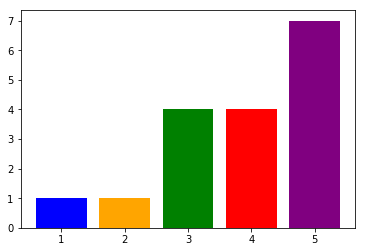

In [4]:
# get the most reviewer's rows
most_reviewer = ans_df.index[0][0]

# 把 most reviewer 的資料另外獨力出來
most_reviewer_df = pd_data[pd_data["UserId"] == most_reviewer]

# get the score set and totally different label
counts = list(pd.value_counts(most_reviewer_df.Score))
score = list(pd.value_counts(most_reviewer_df.Score).keys())

# sort value for plotting with order colors
most_df = pd.DataFrame({"counts": counts, "score": score})
most_df = most_df.sort_values(by = ["score"], ascending = True)

# plot
plt.bar(most_df.score, most_df.counts, color = ["blue", "orange", "green", "red", "purple"])
plt.show()

## 3. Plot pandas Series DataFrame (Time->Date)

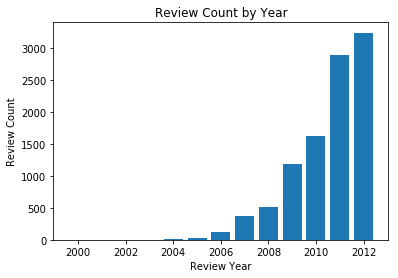

In [5]:
from datetime import datetime

# Because time format is UNIX format, we convert it by using datetime package

# extract only year information
year_df = pd.to_datetime(pd_data["Time"], unit = 's').dt.year

# get year set and totally different year label
year_count = list(year_df.value_counts())
years = list(year_df.value_counts().keys())

# sort value for plotting with order colors
year_data = pd.DataFrame({"x": years, "y": year_count})
year_data = year_data.sort_values(by = ["x"])

plt.bar(year_data.x, year_data.y)
plt.title("Review Count by Year")
plt.xlabel("Review Year")
plt.ylabel("Review Count")
plt.show()

## 4. Plot HeatMap using seaborn

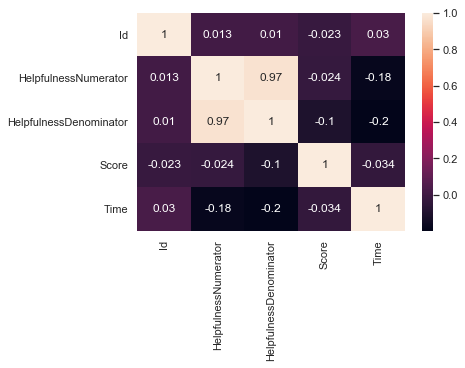

In [6]:
# extract assigned columns to do correlation computing
test = pd_data[["Id", "HelpfulnessNumerator", "HelpfulnessDenominator", "Score", "Time"]]

sns.set()

# test.corr() -> do correlations with all other columns
sns.heatmap(test.corr(), annot = True)

## 5. Helpful percent

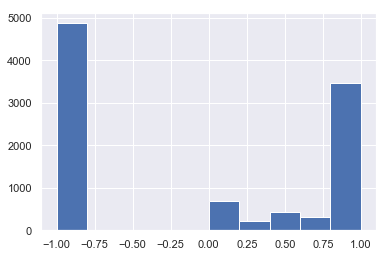

In [7]:
# filt out some cases with numerator > denominator
test = pd_data[pd_data["HelpfulnessNumerator"] <= pd_data["HelpfulnessDenominator"]]

# division computing
test = pd_data["HelpfulnessNumerator"] / pd_data["HelpfulnessDenominator"]

# fill NAN with -1(for those be divided with 0)
test = test.fillna(-1)

# draw histogram
# tolist() 將數組或者矩陣轉換成列表
plt.hist(test.tolist())
plt.show()